In [2]:
import pandas as pd

beers=pd.DataFrame.from_csv("C:/Users/shubhangipatil/Desktop/beers.csv")
breweries=pd.DataFrame.from_csv("C:/Users/shubhangipatil/Desktop/breweries.csv")

C:\Users\shubhangipatil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shubhangipatil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [3]:
beers_breweries=pd.merge(beers,breweries,how='inner',left_on='brewery_id',right_on='id',
                        sort=True,suffixes=('_beer','_brewery'))

In [5]:
beers.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [6]:
def get_var_category(series):
    unique_count=series.nunique(dropna=False)
    total_count=len(series)
    if pd.api.types.is_numeric_dtype(series):
        return ('Numerical')
    elif pd.api.types.is_datetime64_dtype(series):
        return ('Date')
    elif unique_count==total_count:
        return ('Text (Unique)')
    else:
        return ('Categorical')
    
def print_categories(df):
    for column_name in df.columns:
        print(column_name,":",get_var_category(df[column_name]))

In [7]:
print_categories(beers)

abv : Numerical
ibu : Numerical
id : Numerical
name : Categorical
style : Categorical
brewery_id : Numerical
ounces : Numerical


In [8]:
print_categories(breweries)

name : Categorical
city : Categorical
state : Categorical
id : Numerical


In [9]:
length=len(beers['ibu'])
print(length)

2410


In [10]:
count=beers['ibu'].count()
print(count)

1405


In [13]:
number_of_missing=length-count
pct_of_missing_values=float(number_of_missing/length)
pct_of_missing_values="{0:.1f}%".format(pct_of_missing_values*100)
print(pct_of_missing_values)

41.7%


In [14]:
print("Minimum value:",beers["ibu"].min())
print("Maximum value:",beers["ibu"].max())

Minimum value: 4.0
Maximum value: 138.0


In [15]:
print(beers['ibu'].mode())

0    20.0
dtype: float64


In [16]:
mean=beers['ibu'].mean()
mean

42.71316725978647

In [17]:
median=beers['ibu'].median()
median

35.0

In [18]:
stddev=beers['ibu'].std()
stddev

25.954065911259324

In [19]:
quantile=beers['ibu'].quantile([.25,.5,.75])
quantile

0.25    21.0
0.50    35.0
0.75    64.0
Name: ibu, dtype: float64

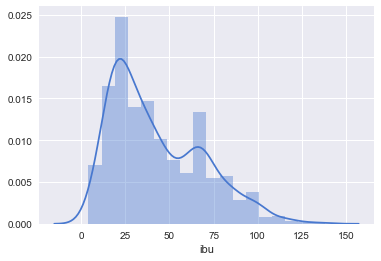

In [21]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(beers['ibu'].dropna())

In [22]:
beers[['abv','ibu','ounces']].corr()

,abv,ibu,ounces
abv,1.000000,0.670621,0.172529
ibu,0.670621,1.000000,0.054691
ounces,0.172529,0.054691,1.000000


In [23]:
beers[['name','style']].describe()

,name,style
count,2410,2405
unique,2305,99
top,Nonstop Hef Hop,American IPA
freq,12,424


In [26]:
import pandas_profiling

pandas_profiling.ProfileReport(beers_breweries)

C:\Users\shubhangipatil\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\shubhangipatil\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\shubhangipatil\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\shubhangipatil\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\shubhangipatil\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\shubhangipatil\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, 

Number of variables,11
Number of observations,2410
Total Missing (%),4.0%
Total size in memory,225.9 KiB
Average record size in memory,96.0 B
Numeric,5
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,1
